## 3. Arboles de Decisión de dataset winequality-red

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
import pandas as pd

Contiene información de 10 clases de calidad del vino

In [2]:
data = pd.read_csv("./csv/winequality-red.csv", sep=",")

In [10]:
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
data.shape

(1599, 12)

Imprime true si hay columnas con valores vacios o false si estan todos llenos

In [4]:
print(data.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [16]:
print(f"La cantidad de valores vacíos en fixed acidity es: {data['fixed acidity'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en volatile acidity es: {data['volatile acidity'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en citric acid es: {data['citric acid'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en residual sugar es: {data['residual sugar'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en chlorides es: {data['chlorides'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en free sulfur dioxide es: {data['free sulfur dioxide'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en total sulfur dioxide es: {data['total sulfur dioxide'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en density es: {data['density'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en pH es: {data['pH'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en sulphates es: {data['sulphates'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en alcohol es: {data['alcohol'].isin([0]).sum()}")
print(f"La cantidad de valores vacíos en quality es: {data['quality'].isin([0]).sum()}")


La cantidad de valores vacíos en fixed acidity es: 0
La cantidad de valores vacíos en volatile acidity es: 0
La cantidad de valores vacíos en citric acid es: 132
La cantidad de valores vacíos en residual sugar es: 0
La cantidad de valores vacíos en chlorides es: 0
La cantidad de valores vacíos en free sulfur dioxide es: 0
La cantidad de valores vacíos en total sulfur dioxide es: 0
La cantidad de valores vacíos en density es: 0
La cantidad de valores vacíos en pH es: 0
La cantidad de valores vacíos en sulphates es: 0
La cantidad de valores vacíos en alcohol es: 0
La cantidad de valores vacíos en quality es: 0


In [14]:
print(data['citric acid'].max())

1.0


In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [23]:
data[['total sulfur dioxide','alcohol']].head()

,total sulfur dioxide,alcohol
0,34.0,9.4
1,67.0,9.8
2,54.0,9.8
3,60.0,9.8
4,34.0,9.4


<Axes: xlabel='total sulfur dioxide', ylabel='alcohol'>

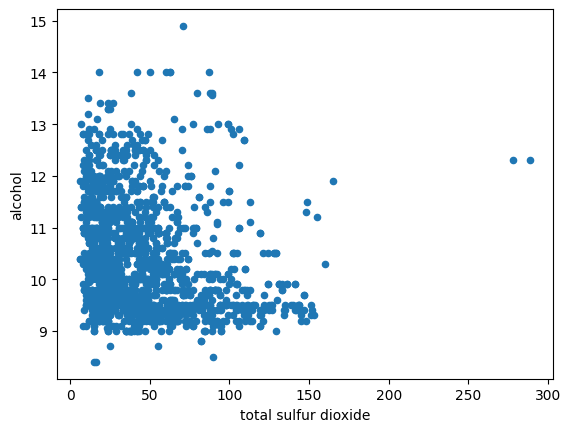

In [27]:
data[['total sulfur dioxide','alcohol']].plot.scatter(x='total sulfur dioxide', y='alcohol')

In [28]:
# pruebas de parametro 

w = -0.00055169
b = -14.58847

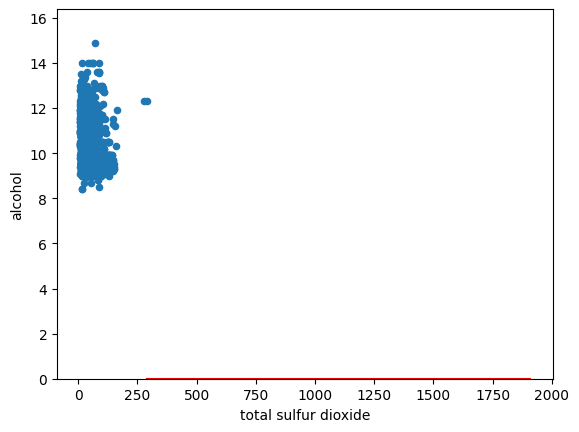

In [29]:
# puntos de la recta
x = np.linspace(1910,data['total sulfur dioxide'].max(),10)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
data.plot.scatter(x='total sulfur dioxide',y='alcohol')
plt.plot(x, y, '-r')
plt.ylim(0,data['alcohol'].max()*1.1)
# plt.grid()
plt.show()

In [118]:
# calculo de las predicciones
data['sigmoid'] = 1/(1+np.exp(-(data['year']*w+b)))

In [119]:
# calculo de la funcion de error
data['loss_xi'] = -data['priceUSD']*np.log(data['sigmoid'])-(1-data['priceUSD'])*np.log(1-data['sigmoid'])
cost_j = data['loss_xi'].mean()
cost_j

116398.97668086365

In [120]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [121]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [122]:
def sum_error_df(df):
    data['sigmoid'] = 1/(1+np.exp(-(data['year']*df['w']+df['b'])))
    data['loss_xi'] = -data['priceUSD']*np.log(data['sigmoid'])-(1-data['priceUSD'])*np.log(1-data['sigmoid'])
    j_cost = data['loss_xi'].mean()
    return(j_cost)

In [123]:
df['error'] = df.apply(sum_error_df, axis=1)

C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [111]:
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,-inf
658,0.11,-3.42,-inf
659,0.11,-3.41,-inf
660,0.11,-3.40,-inf
661,0.11,-3.39,-inf


In [82]:
df_3d = df.pivot(index='w', columns='b', values='error')


In [83]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.06,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.07,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.08,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
0.09,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1180: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1181: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]


C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


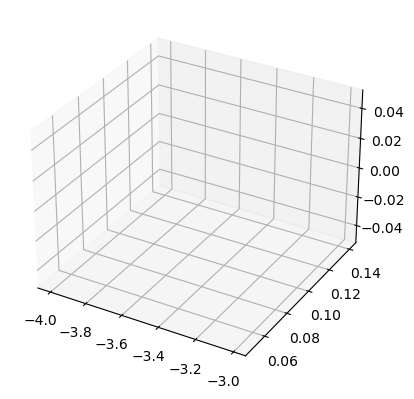

In [85]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\adm_usu\AppData\Local\anaconda3\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


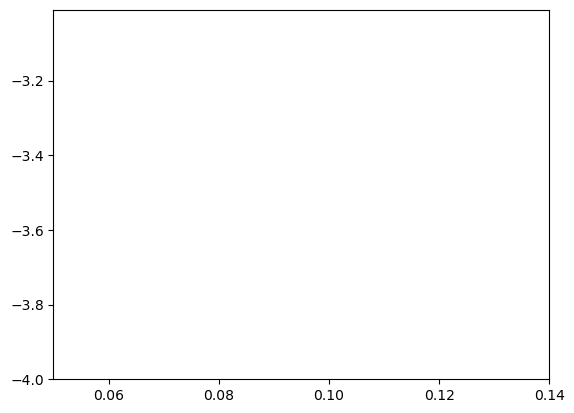

In [86]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)


In [87]:
# Optimizando los parámetros
def delta_j_w(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['year']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['priceUSD'])*data['year']
    derivative = data['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    data['sigmoid'] = 1/(1+np.exp(-(data['year']*w+b)))
    data['partial_loss'] = (data['sigmoid']-data['priceUSD'])
    derivative = data['partial_loss'].mean()
    return(derivative) 

In [91]:
# Damos valores iniciales a 
w_0 = -0.00055169
w_b = -14.58847

In [92]:
# Empezamos a iterar hasta obtener valores que no varíen tanto
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

14895.51610877156 1479.3212879596044


In [90]:
#  lo mismo pero mucho más rápido con sklear
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_data = np.array(data['year']).reshape((-1, 1))
Y_data = np.array(data['priceUSD'])

# creando modelo
model = LogisticRegression()
model.fit(X_data, Y_data)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): [-2.63573742e-07 -2.76106222e-07  2.29901556e-07 ... -2.78580967e-07
 -2.78872667e-07 -2.79164484e-07]
pendiente (w): [[-0.00057618]
 [-0.0005564 ]
 [ 0.00041335]
 ...
 [-0.00055258]
 [-0.00055213]
 [-0.00055169]]
